In [ ]:
# Naive bayes utiliza por padrão distribuição normal (gaussiana). Aplicaremos agora as distribuições de Bernoulli e multinomial (binomial)

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn.naive_bayes import GaussianNB # normal
from sklearn.naive_bayes import BernoulliNB # bernoulli
from sklearn.naive_bayes import MultinomialNB # binomial

from sklearn.metrics import accuracy_score

Bernoulli

In [3]:
df = pd.read_csv('/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/BASES DE DADOS/BD_ML-e-DS-com-Python-de-A-a-Z/census.csv')
# df = pd.read_csv('/content/census.csv')

In [5]:
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# baseado no sexo, buscamos prever se a pessoa ganhará mais ou menosde 50k por ano

In [6]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

/Users/fernandovieira/opt/anaconda3/envs/estat_ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

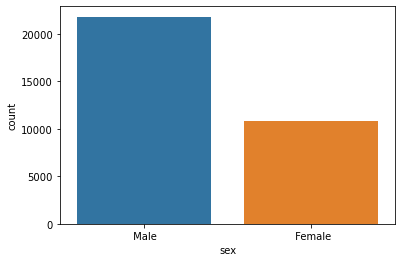

In [9]:
sns.countplot(df['sex'])

In [10]:
x = df['sex'].values
x

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [14]:
x = label_encoder.fit_transform(x)
x

array([1, 1, 1, ..., 0, 1, 0])

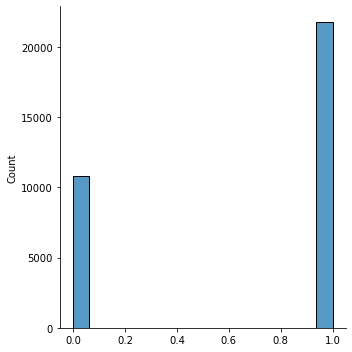

In [15]:
sns.displot(x)

In [16]:
x.shape

(32561,)

In [ ]:
# a biblioteca sklearn necessita estar em formato de matriz

In [17]:
x = x.reshape(-1, 1)
x

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [18]:
y = df['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [19]:
naive_bayes_bernoulli = BernoulliNB()

naive_bayes_bernoulli.fit(x, y) # não separou em treinamento e teste, por ser um exemplo simples

BernoulliNB()

In [20]:
previsoes = naive_bayes_bernoulli.predict(x)

In [21]:
previsoes, y

(array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [23]:
accuracy_score(y, previsoes)

0.7591904425539756

Multinomial

In [24]:
df = pd.read_csv('/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/BASES DE DADOS/BD_ML-e-DS-com-Python-de-A-a-Z/census.csv')
# df = pd.read_csv('/content/census.csv')

In [25]:
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


/Users/fernandovieira/opt/anaconda3/envs/estat_ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

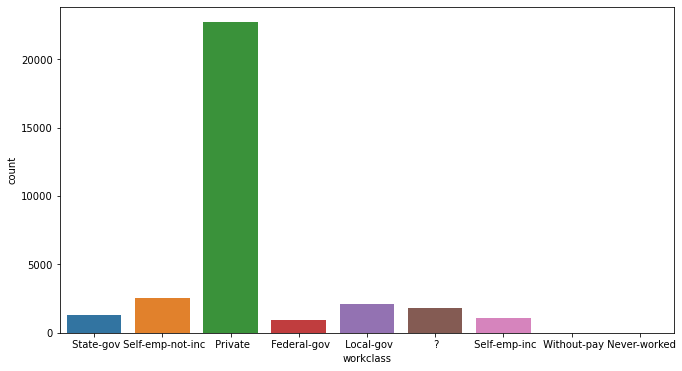

In [30]:
fig = plt.gcf()
fig.set_size_inches(11, 6) # tamanho das plotagens plt

sns.countplot(df['workclass'])

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder0 = LabelEncoder()
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

In [33]:
df['workclass'] = label_encoder0.fit_transform(df['workclass'])
df['education'] = label_encoder1.fit_transform(df['education'])
df['marital-status'] = label_encoder2.fit_transform(df['marital-status'])
df['occupation'] = label_encoder3.fit_transform(df['occupation'])
df['relationship'] = label_encoder4.fit_transform(df['relationship'])
df['race'] = label_encoder5.fit_transform(df['race'])
df['native-country'] = label_encoder6.fit_transform(df['native-country'])

In [34]:
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,Female,0,0,38,39,<=50K
32557,40,4,154374,11,9,2,7,0,4,Male,0,0,40,39,>50K
32558,58,4,151910,11,9,6,1,4,4,Female,0,0,40,39,<=50K
32559,22,4,201490,11,9,4,1,3,4,Male,0,0,20,39,<=50K


In [35]:
x = df.iloc[:, [1, 3, 5, 6, 7, 8, 13]].values

In [36]:
y = df['income'].values

In [37]:
naive_bayes_multinomial = MultinomialNB()
naive_bayes_multinomial.fit(x, y)

MultinomialNB()

In [38]:
previsoes = naive_bayes_multinomial.predict(x)

In [39]:
previsoes, y

(array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [40]:
accuracy_score(y, previsoes)

0.7485949448727005